# Test Scores

The dataset contains tests written by student, and task for this dataset is build a best machine learning model to predict scores of the students.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import seaborn as sns

In [2]:
df = pd.read_csv("test_scores.csv")
df

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...
2128,ZOWMK,Urban,Public,ZBH,Standard,30.0,T8LSK,Female,Does not qualify,39.0,55.0
2129,ZOWMK,Urban,Public,ZBH,Standard,30.0,VNP26,Female,Qualifies for reduced/free lunch,38.0,46.0
2130,ZOWMK,Urban,Public,ZBH,Standard,30.0,YDR1Z,Female,Qualifies for reduced/free lunch,45.0,51.0
2131,ZOWMK,Urban,Public,ZBH,Standard,30.0,YUEIH,Male,Qualifies for reduced/free lunch,46.0,53.0


# 1 Data Cleaning

In [3]:
df.isnull().sum()

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

In [4]:
df2 = df.drop(['classroom','student_id'], axis='columns')
df2.head()

,school,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0


Why i remove those columns first? becasue i think classroom and id of student isn't related with posttest. And this time i let the school column persist cause school take effect for student learning and definitely have an effect for students scores or posttest.

<AxesSubplot:xlabel='pretest', ylabel='posttest'>

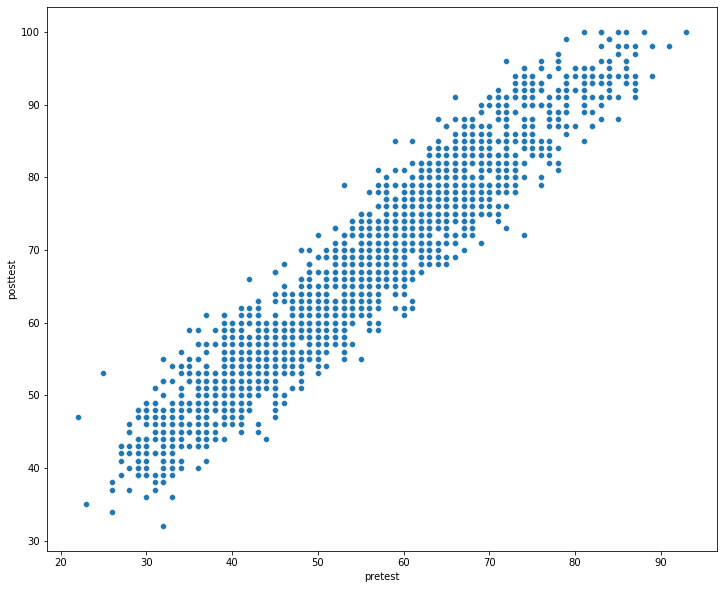

In [5]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x='pretest', y='posttest', data=df2)

<AxesSubplot:xlabel='n_student', ylabel='posttest'>

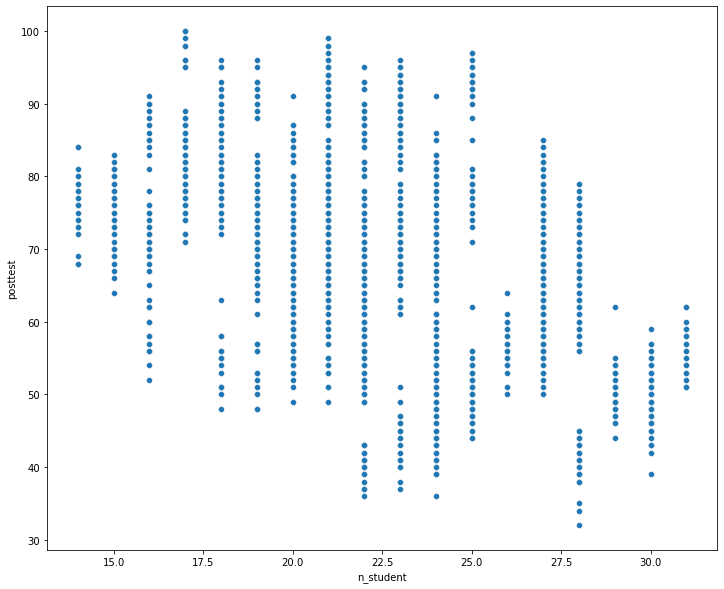

In [6]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x='n_student', y='posttest', data=df2)

In [7]:
df2.school.unique()

array(['ANKYI', 'CCAAW', 'CIMBB', 'CUQAM', 'DNQDD', 'FBUMG', 'GJJHK',
       'GOKXL', 'GOOBU', 'IDGFP', 'KFZMY', 'KZKKE', 'LAYPA', 'OJOBU',
       'QOQTS', 'UAGPU', 'UKPGS', 'UUUQX', 'VHDHF', 'VKWQH', 'VVTVA',
       'ZMNYA', 'ZOWMK'], dtype=object)

In [8]:
df2.school_setting.unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
df2['teaching_method'].unique()

array(['Standard', 'Experimental'], dtype=object)

In [10]:
df2[(df2['school']=='CCAAW') & (df2['school_setting']=='Rural')]

,school,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest


In [11]:
df2.columns

Index(['school', 'school_setting', 'school_type', 'teaching_method',
       'n_student', 'gender', 'lunch', 'pretest', 'posttest'],
      dtype='object')

In [12]:
def check(df, colmn):
    for key in df['school'].unique():
        for key2 in df[colmn].unique():
            if len(df[(df['school']==key) & (df[colmn]==key2)])>0:
                print(key + ' = ' + key2)
    print("===============================")

In [13]:
for key in df2.columns:
    if key!='school' and key !='posttest' and key !='n_student' and key !='pretest':
        check(df2,key)

ANKYI = Urban
CCAAW = Suburban
CIMBB = Urban
CUQAM = Urban
DNQDD = Suburban
FBUMG = Rural
GJJHK = Suburban
GOKXL = Rural
GOOBU = Urban
IDGFP = Urban
KFZMY = Urban
KZKKE = Rural
LAYPA = Rural
OJOBU = Rural
QOQTS = Urban
UAGPU = Suburban
UKPGS = Suburban
UUUQX = Suburban
VHDHF = Rural
VKWQH = Rural
VVTVA = Urban
ZMNYA = Suburban
ZOWMK = Urban
ANKYI = Non-public
CCAAW = Non-public
CIMBB = Non-public
CUQAM = Public
DNQDD = Public
FBUMG = Non-public
GJJHK = Public
GOKXL = Public
GOOBU = Public
IDGFP = Non-public
KFZMY = Non-public
KZKKE = Public
LAYPA = Public
OJOBU = Public
QOQTS = Public
UAGPU = Public
UKPGS = Public
UUUQX = Non-public
VHDHF = Non-public
VKWQH = Public
VVTVA = Public
ZMNYA = Public
ZOWMK = Public
ANKYI = Standard
CCAAW = Standard
CCAAW = Experimental
CIMBB = Standard
CIMBB = Experimental
CUQAM = Standard
CUQAM = Experimental
DNQDD = Standard
DNQDD = Experimental
FBUMG = Experimental
GJJHK = Standard
GJJHK = Experimental
GOKXL = Standard
GOKXL = Experimental
GOOBU = Standa

In [14]:
df3 = df2.drop(['school'],axis='columns')
df3.head()

,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
0,Urban,Non-public,Standard,20.0,Female,Does not qualify,62.0,72.0
1,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0,79.0
2,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0
3,Urban,Non-public,Standard,20.0,Female,Does not qualify,61.0,77.0
4,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0


If you notice that pretest is so take effect for posttest and for n_students column i don't know exactly what it is but if you look at the scater plot maybe you relazed that the column little bit take effect for posttest. And then i wrote a function for check whether every school has more than one school_type, teaching_method, etc.. Then i realized that result from the function that every school has one school_setting, so i removed the school column to facilitate next step.

For next step, i'm very curious about lunch column.

<AxesSubplot:xlabel='lunch', ylabel='posttest'>

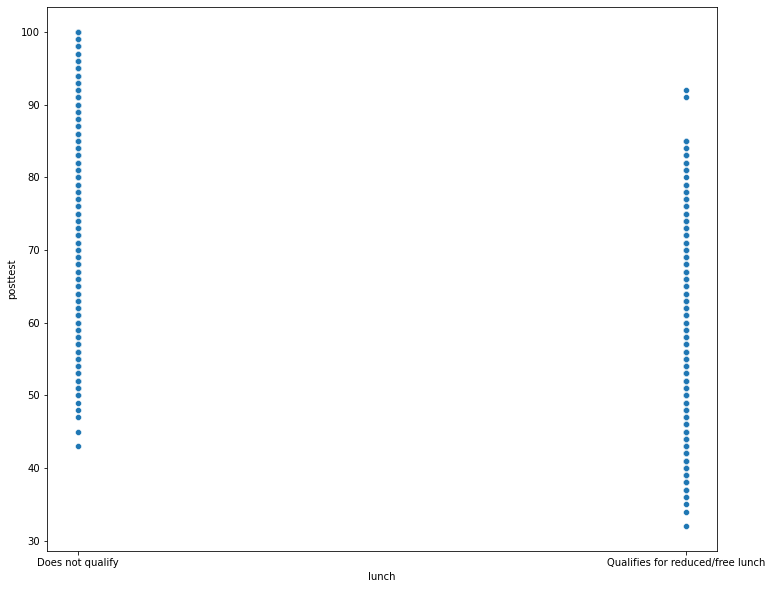

In [15]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x='lunch', y='posttest', data=df3)

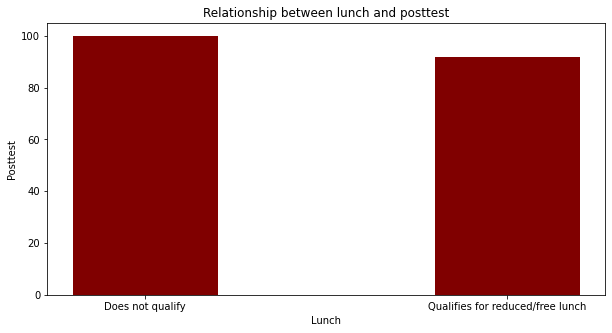

In [16]:
fig = plt.figure(figsize = (10, 5))
plt.bar(df3['lunch'], df3['posttest'], color ='maroon', width = 0.4)
plt.xlabel("Lunch")
plt.ylabel("Posttest")
plt.title("Relationship between lunch and posttest")
plt.show()

In [17]:
lunch = {
    'Qualifies for reduced/free lunch': 1,
    'Does not qualify': 0
}
df_plot = pd.DataFrame()
df_plot['lunch'] = [lunch[item] for item in df3['lunch']]
df_plot['posttest'] = df3['posttest']

<AxesSubplot:>

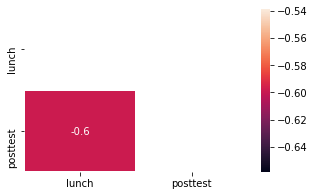

In [18]:
plt.figure(figsize=(5, 3))
matrix2 = np.triu(df_plot.corr())
sns.heatmap(df_plot.corr(), annot=True, linewidths=.8, mask=matrix2, cmap="rocket")

From the plot and the diagram, i noticed that lunch column is no related with posttes, so i'll remove it.

In [19]:
df4 = df3.drop(['lunch'], axis='columns')
df4.head(5)

,school_setting,school_type,teaching_method,n_student,gender,pretest,posttest
0,Urban,Non-public,Standard,20.0,Female,62.0,72.0
1,Urban,Non-public,Standard,20.0,Female,66.0,79.0
2,Urban,Non-public,Standard,20.0,Male,64.0,76.0
3,Urban,Non-public,Standard,20.0,Female,61.0,77.0
4,Urban,Non-public,Standard,20.0,Male,64.0,76.0


# 2 Dummy

We know that machine learning can't handle teks. So we must transform the data teks.

In [20]:
school = pd.get_dummies(df4['school_setting'])
teaching = pd.get_dummies(df4['teaching_method'])
gender = pd.get_dummies(df4['gender'])
stype = pd.get_dummies(df4['school_type'])
merged = pd.concat([df4,school,teaching,gender,stype],axis=1)
merged.head()

,school_setting,school_type,teaching_method,n_student,gender,pretest,posttest,Rural,Suburban,Urban,Experimental,Standard,Female,Male,Non-public,Public
0,Urban,Non-public,Standard,20.0,Female,62.0,72.0,0,0,1,0,1,1,0,1,0
1,Urban,Non-public,Standard,20.0,Female,66.0,79.0,0,0,1,0,1,1,0,1,0
2,Urban,Non-public,Standard,20.0,Male,64.0,76.0,0,0,1,0,1,0,1,1,0
3,Urban,Non-public,Standard,20.0,Female,61.0,77.0,0,0,1,0,1,1,0,1,0
4,Urban,Non-public,Standard,20.0,Male,64.0,76.0,0,0,1,0,1,0,1,1,0


In [21]:
merged2 = merged.drop(['school_setting','teaching_method','gender','Urban','school_type'],axis='columns')
merged2.head(5)

,n_student,pretest,posttest,Rural,Suburban,Experimental,Standard,Female,Male,Non-public,Public
0,20.0,62.0,72.0,0,0,0,1,1,0,1,0
1,20.0,66.0,79.0,0,0,0,1,1,0,1,0
2,20.0,64.0,76.0,0,0,0,1,0,1,1,0
3,20.0,61.0,77.0,0,0,0,1,1,0,1,0
4,20.0,64.0,76.0,0,0,0,1,0,1,1,0


In [22]:
merged2.shape

(2133, 11)

# 3 Modeling

In [23]:
X_train = merged2.drop(['pretest'], axis='columns')
y_train = merged2['pretest']

In [24]:
from sklearn import linear_model
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [25]:
model_params = {
    'linear_regression': {
        'model': linear_model.LinearRegression(),
        'params': {
            'n_jobs': [1,2,3,-1]
        }
    },
    'decisson_tree_regressor': {
        'model': tree.DecisionTreeRegressor(),
        'params': {
            'criterion': ['mse','friedman_mse','mae','poisson'],
        }
    }
}

In [26]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [27]:
best = pd.DataFrame(scores,columns=['model','best_score','best_params'])
best

,model,best_score,best_params
0,linear_regression,0.902631,{'n_jobs': 1}
1,decisson_tree_regressor,0.738171,{'criterion': 'mae'}


Linear Regression is the best model for this case. So we can use it!!!

Credit: https://www.kaggle.com/kwadwoofosu/predict-test-scores-of-students